In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

e = math.e

# The python definition of f(x) for problem 1.

def problem_function(x):
    if (x <= 100):
        return float(-e**(-(x/100)**2))
    else:
        return float(-e**(-1) + (x - 100)*(x - 102))

In [2]:
import os
import sys
import random

# Some definitions for the following variables which will be used in simulated annealing.
'''
        f               :   The function which metaheuristics are being used to test.
        s_0             :   Initial solution.
        t_0             :   Initial temperature.
        temp_reduc_func :   Temperature reduction function.
        acc_prob_func   :   Acceptance probability function.
        stop_cond       :   The function which yields a boolean value of whether to continue the algorithm.
        max_i           :   The maximum amount of iterations
        max_epoch       :   The amount of epochs before the the temperature reduction function is used. 
'''


def simulated_annealing(f, s_0, t_0, neighbourhood_func, temp_reduc_func, acc_prob_func, stop_cond, max_i, max_epoch, print_workings=False):
    # Sets the initial value of s_n (when n = 0)
    solution = s_0
    # Sets the initial value of s_n-1 (not used for the first iteration of the outer loop)
    prev_solution = s_0
    # The current temperature
    temperature = t_0
    # The iterations of the outer (while) loop.
    iteration_counter = 0
    step_array = []
    while (iteration_counter == 0 or not stop_cond(iteration_counter, max_i, solution, prev_solution)):
        if (print_workings == True):
            print("--------------------------------------------------------------------------------------------\ns_%d: %f" % (iteration_counter, solution))
        prev_solution = solution
        step_array.append((solution, temperature))
        for epoch in range(1, max_epoch+1):
            neighbourhood = neighbourhood_func(solution)
            possible_solution = neighbourhood[random.randrange(
                0, len(neighbourhood))]
            solution_eval_diff = f(possible_solution) - f(solution)
            # If the difference between the possible solution (solution picked in the current epoch) and the solution (the solution of the current iteration of epochs) when put through the acceptance probablity function, is greater than random noise then pick it.
            accepted = False
            if (solution_eval_diff < 0 or acc_prob_func(
                    solution_eval_diff, temperature) > random.random()):
                # Set a new value of solution
                solution = possible_solution
                accepted = True
            if (print_workings == True):
                print("Epoch: %d\ts: %f\tt: %f\tAccepted: %g" % (epoch, possible_solution, temperature, accepted))
        # Reduce the temperature and increment the iteration counter
        temperature = temp_reduc_func(temperature)
        iteration_counter += 1
    return (step_array, solution)

In [3]:
# Graph the results (data is a tuple of x's and tempaturature per epoch)

def plot_problem(f, xrange, data, print_data=False): 
    xs = np.linspace(xrange[0], xrange[1], 2*(xrange[1]-xrange[0]))
    ys = np.array([f(i) for i in xs ])
    
    data_length = len(data)
    s_0 = data[0][0]
    s_n = data[-1][0]
    
    temperatures = np.array([round(i[1], 2) for i in data])
    xdata = np.array([i[0] for i in data])
    xplots = np.array([round(i, 2) for i in xdata])
    yplots = np.array([round(f(i), 2) for i in xdata])
    
    # Work out bounds of graph
    height = (f(xrange[0]), f(xrange[1]))
    width = xrange
    midpoint = ((width[0]+width[1])/2, (height[0]+height[1])/2)

    # MatPlotLib
    
    # Plot the problem line
    plt.title("Problem line (only)")
    plt.plot(xs, ys, '-g', label="f(x)")
    plt.legend(framealpha=0.4)
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.show()
    
    # Plot the results against problem line
    plt.title("Results against problem line")
    line = plt.plot(xs, ys, '-g', label="f(x)")
    
    # Plot array_plottings
    tenth_data_length = int(data_length/10)
    for i in range(10):
        colour = ((10-i)/10, 0, i/10)
        label=" "
        if (i == 0):
            label="Epoch (hot temp)"
        if (i == 9):
            label="Epoch (cold temp)"
        plt.plot(xplots[i*tenth_data_length:(i+1)*tenth_data_length], yplots[i*tenth_data_length:(i+1)*tenth_data_length], "o", color=colour, label=label)
    
    # Annotate first and last plots
    plt.annotate(s="Start point", xy=(xplots[0], yplots[0]), xytext=(midpoint[0], midpoint[1]+70), arrowprops=dict(arrowstyle='->'))
    plt.annotate(s="Finish point", xy=(xplots[-1], yplots[-1]), xytext=(midpoint[0], midpoint[1]+30), arrowprops=dict(arrowstyle='->'))
    
    plt.legend(framealpha=0.4)
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.show()
    if (print_data == True):
        print("Plot data (2DP)\n_____________________________________\nEpoch\tTemperature\tSolution")
        for i in range(data_length):
            print("{}\t{}\t\t({}, {})".format(i, temperatures[i], xplots[i], yplots[i]))

In [3]:
s_0 = 120
t_0 = float(1000)
max_i = 50
max_epoch = 50

def neighbourhood_func(x):
    neighbourhood = [x-0.1, x+0.1]
    return neighbourhood


def temp_reduc_func(x):
    return float(0.75*x)


def acc_prob_func(diff, temperature):
    return float(e**(-diff/temperature))


def stop_cond(iteration_counter, max_i, solution, prev_solution):
    if (iteration_counter > 0):
        if (iteration_counter >= max_i):
            return True
    return False

In [6]:
# Run simulated annealing (test)
simulated_annealing_results = simulated_annealing(problem_function, s_0,
                    t_0, neighbourhood_func, temp_reduc_func, acc_prob_func, stop_cond, max_i, max_epoch, True)

--------------------------------------------------------------------------------------------
s_0: 120.000000
Epoch: 1	s: 120.100000	t: 1000.000000	Accepted: 1
Epoch: 2	s: 120.200000	t: 1000.000000	Accepted: 1
Epoch: 3	s: 120.100000	t: 1000.000000	Accepted: 1
Epoch: 4	s: 120.000000	t: 1000.000000	Accepted: 1
Epoch: 5	s: 120.100000	t: 1000.000000	Accepted: 1
Epoch: 6	s: 120.000000	t: 1000.000000	Accepted: 1
Epoch: 7	s: 119.900000	t: 1000.000000	Accepted: 1
Epoch: 8	s: 120.000000	t: 1000.000000	Accepted: 1
Epoch: 9	s: 120.100000	t: 1000.000000	Accepted: 1
Epoch: 10	s: 120.200000	t: 1000.000000	Accepted: 1
Epoch: 11	s: 120.300000	t: 1000.000000	Accepted: 1
Epoch: 12	s: 120.200000	t: 1000.000000	Accepted: 1
Epoch: 13	s: 120.300000	t: 1000.000000	Accepted: 1
Epoch: 14	s: 120.200000	t: 1000.000000	Accepted: 1
Epoch: 15	s: 120.100000	t: 1000.000000	Accepted: 1
Epoch: 16	s: 120.200000	t: 1000.000000	Accepted: 1
Epoch: 17	s: 120.100000	t: 1000.000000	Accepted: 1
Epoch: 18	s: 120.000000	t: 1000.0

Epoch: 15	s: 101.200000	t: 0.017878	Accepted: 0
Epoch: 16	s: 101.200000	t: 0.017878	Accepted: 0
Epoch: 17	s: 101.200000	t: 0.017878	Accepted: 0
Epoch: 18	s: 101.000000	t: 0.017878	Accepted: 1
Epoch: 19	s: 101.100000	t: 0.017878	Accepted: 1
Epoch: 20	s: 101.200000	t: 0.017878	Accepted: 0
Epoch: 21	s: 101.200000	t: 0.017878	Accepted: 0
Epoch: 22	s: 101.200000	t: 0.017878	Accepted: 0
Epoch: 23	s: 101.000000	t: 0.017878	Accepted: 1
Epoch: 24	s: 100.900000	t: 0.017878	Accepted: 1
Epoch: 25	s: 101.000000	t: 0.017878	Accepted: 1
Epoch: 26	s: 100.900000	t: 0.017878	Accepted: 0
Epoch: 27	s: 101.100000	t: 0.017878	Accepted: 1
Epoch: 28	s: 101.000000	t: 0.017878	Accepted: 1
Epoch: 29	s: 100.900000	t: 0.017878	Accepted: 1
Epoch: 30	s: 100.800000	t: 0.017878	Accepted: 0
Epoch: 31	s: 101.000000	t: 0.017878	Accepted: 1
Epoch: 32	s: 100.900000	t: 0.017878	Accepted: 1
Epoch: 33	s: 101.000000	t: 0.017878	Accepted: 1
Epoch: 34	s: 100.900000	t: 0.017878	Accepted: 1
Epoch: 35	s: 101.000000	t: 0.017878	Acce

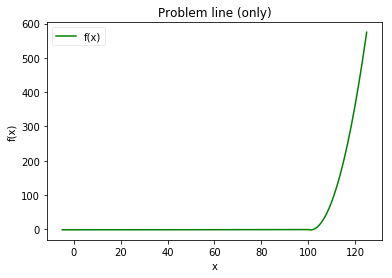

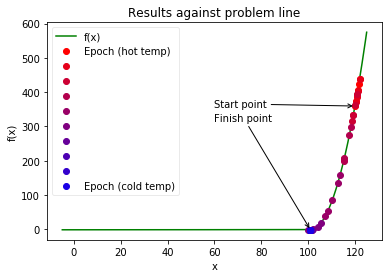

In [71]:
# Graph results
plot_problem(problem_function, (-5, 125), simulated_annealing_results[0])

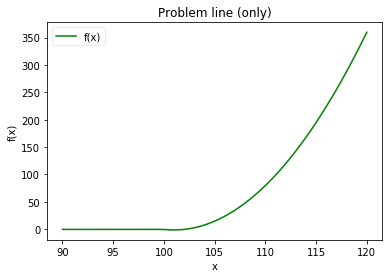

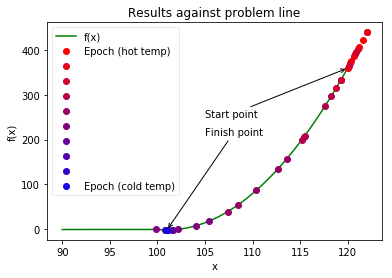

In [72]:
# Graph results
plot_problem(problem_function, (90, 120), simulated_annealing_results[0])

In [4]:
# Graph the accuraty of a model when multiple batches are run with different starting values
import statistics as stat
from mpl_toolkits.mplot3d import Axes3D as plot3d

def plot_2d_batch_accuracy(dependant_variable_name, independant_variable_name, expected_dependant_value, data): 
    data_length = len(data)
    xs = np.array([i["x"] for i in data])
    ys = np.array([i["y"] for i in data])

    # MatPlotLib
    
    # How independant var affects dependant var (using other starting vars)
    plt.title('{} with respect to {}'.format(dependant_variable_name.capitalize(), independant_variable_name))
    plt.scatter(xs, ys, c='b', marker="d", label="Results")
    plt.plot([xs[0], xs[-1]], [expected_dependant_value, expected_dependant_value], "-g", label='Target ({})'.format(expected_dependant_value))
    plt.legend(framealpha=0.4)
    plt.xlabel(independant_variable_name)
    plt.ylabel(dependant_variable_name)
    plt.show()
    
    # Calc SD of dependant data
    sd = stat.stdev(ys, expected_dependant_value)
    sds = np.array([abs(101-y)/sd for y in ys])
    
    # How independant var affects the standard deviation from target (of dependant var)
    plt.title('Standard deviation with {}'.format(independant_variable_name))
    plt.scatter(xs, sds, c='r', marker="d", label='SD (1 SD = {})'.format(round(sd, 2)))
    plt.legend(framealpha=0.4)
    plt.xlabel(independant_variable_name)
    plt.ylabel('Standard deviation from target ({})'.format(expected_dependant_value))
    plt.show()
    

def plot_3d_batch_accuracy(x_name, y_name, z_name, expected_z_value, data):
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    #plt.title('How {} & {} affect {}'.format(str.capitalize(x_name), y_name, z_name))

    xs = np.array([d["x"] for d in data])
    ys = np.array([d["y"] for d in data])
    zs = np.array([d["z"] for d in data])    

    # Plot a 3d scatter of the data
    ax.scatter(xs, ys, zs, c="b", marker="x")

    # Customize the z axis.
    ax.set_xlabel(x_name)
    ax.set_ylabel(y_name)
    ax.set_zlabel(z_name)
    plt.show()
    
    # Calc SD of dependant data
    sd = stat.stdev(zs, expected_z_value)
    sds = np.array([abs(101-z)/sd for z in zs])
    
    fig = plt.figure()
    ax = fig.gca(projection='3d')
   # plt.title('Standard deviation with {} & {}'.format(x_name, y_name))
    
    # Plot a 3d scatter of the data with SD 
    ax.scatter(xs, ys, sds, c="r", marker="x")

    # Customize the z axis.
    ax.set_xlabel(x_name)
    ax.set_ylabel(y_name)
    ax.set_zlabel('Standard deviation from target ({})'.format(expected_z_value))
    plt.show()

In [75]:
#Run the simulated annealing on a range of different starting positions

accuracy_wth_respect_to_starting_position = []
for i in range(60):
    start = i*5-50
    s_a_result = simulated_annealing(problem_function, start,
                    t_0, neighbourhood_func, temp_reduc_func, acc_prob_func, stop_cond, max_i, max_epoch)[1]
    accuracy_wth_respect_to_starting_position.append({"x": start, "y": s_a_result, "diff_to_target": abs(101-s_a_result)})


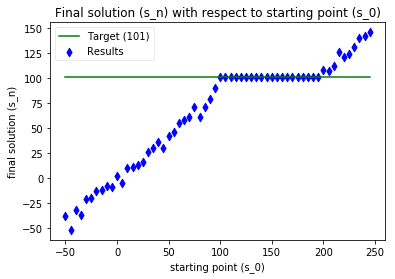

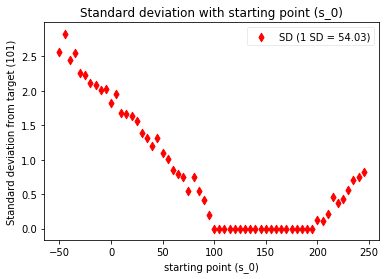

In [82]:
plot_2d_batch_accuracy("final solution (s_n)", "starting point (s_0)", 101, accuracy_wth_respect_to_starting_position)

In [86]:
#Run the simulated annealing on a range of different starting temperatures and temperature reduction gradients

def accuracy_with_temp(s_0):
    results = []
    for i in range(50):
        start_temp = i*20+1
        for j in range(50):
            temp_gradient = (1+j)/52
            def linear_temp_reduction_f(t):
                return t*temp_gradient
            s_a_result = simulated_annealing(problem_function, s_0,
                        start_temp, neighbourhood_func, linear_temp_reduction_f, acc_prob_func, stop_cond, max_i, max_epoch)[1]
            results.append({"x": start_temp, "y": temp_gradient, "z": s_a_result})
    return results
    
#starting at s_0 = 80 (-21 from target)
accuracy_wth_respect_to_temp_at_80 = accuracy_with_temp(80)
#starting at s_0 = 101 (on target)
accuracy_wth_respect_to_temp_at_101 = accuracy_with_temp(101)
#starting at s_0 = 120 (+21 from target)
accuracy_wth_respect_to_temp_at_120 = accuracy_with_temp(120)

When s_0 is 80


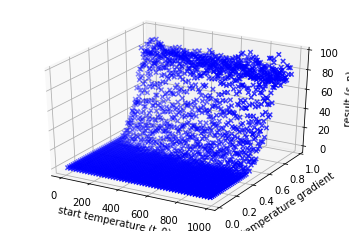

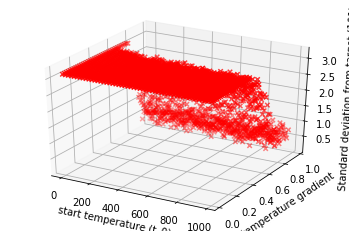

When s_0 is 101


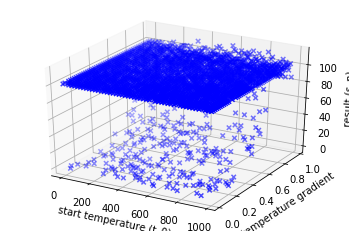

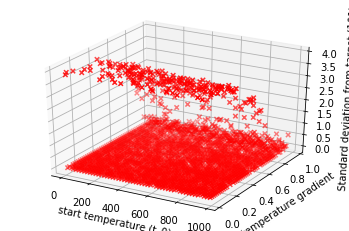

When s_0 is 120


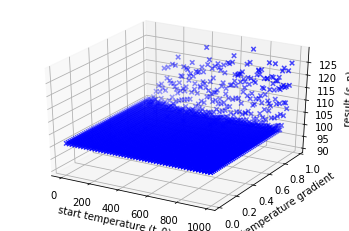

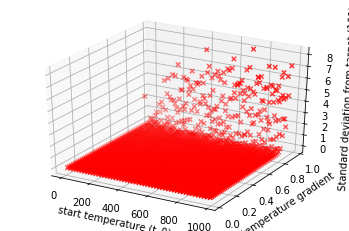

In [99]:
print("When s_0 is 80")
plot_3d_batch_accuracy("start temperature (t_0)", "temperature gradient", "result (s_n)", 101, accuracy_wth_respect_to_temp_at_80)

print("When s_0 is 101")
plot_3d_batch_accuracy("start temperature (t_0)", "temperature gradient", "result (s_n)", 101, accuracy_wth_respect_to_temp_at_101)

print("When s_0 is 120")
plot_3d_batch_accuracy("start temperature (t_0)", "temperature gradient", "result (s_n)", 101, accuracy_wth_respect_to_temp_at_120)

In [5]:
# Create a neighbourhood of pairs amount of points either side of x, which have a difference of step.
# Returns [x-0.1, x+0.1] by default
def flexible_neighbourhood_func(x, step=0.1, pairs=1):
    neighbourhood = []
    for i in range(0, pairs):
        xdiff = step*(i+1)
        neighbourhood.append(x-xdiff)
        neighbourhood.append(x+xdiff)
    return neighbourhood

In [6]:
flexible_neighbourhood_func(1, 0.2, 2)

[0.8, 1.2, 0.6, 1.4]

In [10]:
def accuracy_with_neighbourhood(s_0):
    results = []
    for i in range(1, 11):
        pairs = i
        for j in range(40):
            step = (j+1)/20
            s_a_result = simulated_annealing(problem_function, s_0,
                        t_0, lambda x: flexible_neighbourhood_func(x, step, pairs), temp_reduc_func, acc_prob_func, stop_cond, max_i, max_epoch)[1]
            results.append({"x": step, "y": pairs, "z": s_a_result})
    return results

#starting at s_0 = 80 (-21 from target)
accuracy_wth_respect_to_nh_at_80 = accuracy_with_neighbourhood(80)
#starting at s_0 = 101 (on target)
accuracy_wth_respect_to_nh_at_101 = accuracy_with_neighbourhood(101)
#starting at s_0 = 120 (+21 from target)
accuracy_wth_respect_to_nh_at_120 = accuracy_with_neighbourhood(120)

When s_0 is 80


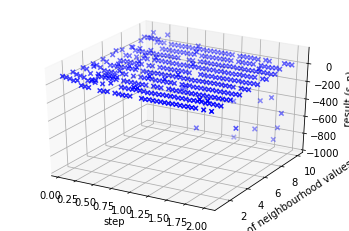

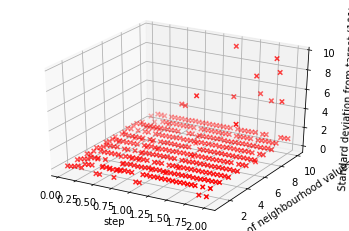

When s_0 is 101


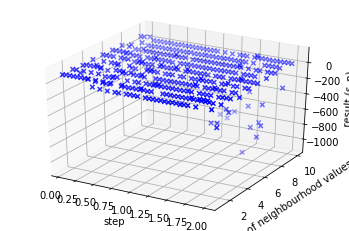

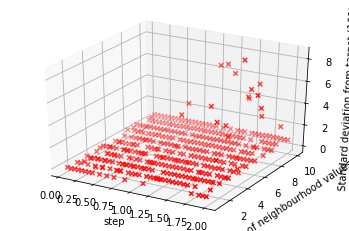

When s_0 is 120


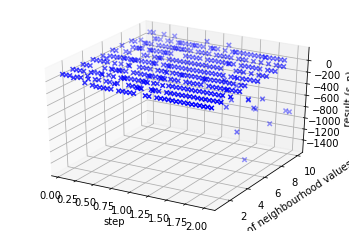

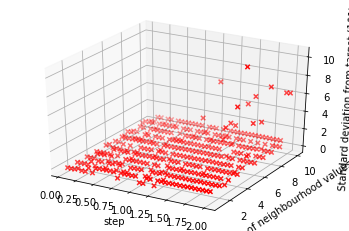

In [11]:
print("When s_0 is 80")
plot_3d_batch_accuracy("step", "pairs of neighbourhood values", "result (s_n)", 101, accuracy_wth_respect_to_nh_at_80)

print("When s_0 is 101")
plot_3d_batch_accuracy("step", "pairs of neighbourhood values", "result (s_n)", 101, accuracy_wth_respect_to_nh_at_101)

print("When s_0 is 120")
plot_3d_batch_accuracy("step", "pairs of neighbourhood values", "result (s_n)", 101, accuracy_wth_respect_to_nh_at_120)